In [1]:
import scipy.ndimage as ndi
#import cv2
import numpy as np
import matplotlib.pyplot as plt
import pims
#import libtiff
import time,sys
import csv
# ~ import skimage
# ~ from skimage.morphology import watershed
# ~ from skimage.feature import peak_local_max
# ~ from skimage import measure
import glob,os

!ls


Count_series_makepandas.ipynb
Count_series_makepandas_removeS15.ipynb
Rbdylight405_viruses_MsAF647_seelayout_01_B01_R3D_D3D_PRJ.dv
Rbdylight405_viruses_MsAF647_seelayout_01_B02_R3D_D3D_PRJ.dv
Rbdylight405_viruses_MsAF647_seelayout_01_B03_R3D_D3D_PRJ.dv
Rbdylight405_viruses_MsAF647_seelayout_01_B04_R3D_D3D_PRJ.dv
Rbdylight405_viruses_MsAF647_seelayout_01_B05_R3D_D3D_PRJ.dv
Rbdylight405_viruses_MsAF647_seelayout_01_B06_R3D_D3D_PRJ.dv
Rbdylight405_viruses_MsAF647_seelayout_01_B07_R3D_D3D_PRJ.dv
Rbdylight405_viruses_MsAF647_seelayout_01_B08_R3D_D3D_PRJ.dv
Rbdylight405_viruses_MsAF647_seelayout_01_B09_R3D_D3D_PRJ.dv
Rbdylight405_viruses_MsAF647_seelayout_01_B10_R3D_D3D_PRJ.dv
Rbdylight405_viruses_MsAF647_seelayout_01_B11_R3D_D3D_PRJ.dv
Rbdylight405_viruses_MsAF647_seelayout_01_B12_R3D_D3D_PRJ.dv
Rbdylight405_viruses_MsAF647_seelayout_01_C01_R3D_D3D_PRJ.dv
Rbdylight405_viruses_MsAF647_seelayout_01_C02_R3D_D3D_PRJ.dv
Rbdylight405_viruses_MsAF647_seelayout_01_C03_R3D_D3D_PRJ.dv
Rbdylight405_vi

In [2]:
ficheiro = 'Rbdylight405_viruses_MsAF647_seelayout_01_G04_R3D_D3D_PRJ.dv'

In [3]:
    from skimage import filters
    import pims
    import sys
    import numpy as np
    #sys.path.insert(0,'/home/jmamede/scripts')
    from support_pla import *
    import pandas as pd
        #for blobs/dots
    minsmask=4
    maxsmask=80
    #for cell mask
    cells=3
#    virus=0
    label=2
    #tag
    chan1=0
    #IN
    chan2=1
    #GFP
    chan3=2
    #cGAS
    chan4=3

In [4]:
    
    reader = pims.bioformats.BioformatsReader(ficheiro,java_memory='1024m')
    #reader = pims.ReaderSequence(ficheiro, pims.bioformats.BioformatsReader)
    meta = reader.metadata
    nseries = meta.ImageCount()

/home/jmamede/anaconda2/lib/python2.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [6]:
s= 0
reader.series = s
reader.bundle_axes = 'yx'
reader.iter_axes = 'c'

In [13]:
%matplotlib qt5

plt.imshow(reader[3])

In [5]:
%matplotlib qt5
nseries = meta.ImageCount()
f, axarr = plt.subplots(2,2)

df = pd.DataFrame()
from IPython import display

plt.ion()
plt.draw()

In [6]:
    #%matplotlib inline 
    #reader.series = s
    #reader.bundle_axes = 'yx'
    #reader.iter_axes = 'c'
    #cells = 3
    #zproject = reader[cells]
    #cells_mask = cell_mask(zproject,np.mean(zproject),size=100)
    #axarr[0,0].imshow(zproject,vmin=np.mean(zproject),vmax=500,cmap='gray')
    #print cm3d
    #plt.imshow(reader[label])
    #reader[cells].shape

In [7]:
for s in range(nseries):

    reader.series = s
    reader.bundle_axes = 'yx'
    reader.iter_axes = 'c'
    cells = 3
    #zproject = reader[cells]
    #cells_mask = cell_mask(zproject,np.mean(zproject),size=100)
    #axarr[0,0].imshow(zproject,vmin=np.mean(zproject),vmax=500,cmap='gray')
    
    #axarr[0,1].imshow(cm3d)
    #cm3d = cells_mask    
    cm3d = np.ones(reader[cells].shape)
    axarr[0,1].imshow(cm3d)
    label_img = multiply(reader[label],cm3d)
    axarr[0,0].imshow(label_img,vmin=np.mean(cm3d),vmax=1500,cmap='gray')
    chan1_img = multiply(reader[chan1],cm3d)
    chan2_img = multiply(reader[chan2],cm3d)
    chan3_img = multiply(reader[chan3],cm3d)
    chan4_img = multiply(reader[chan4],cm3d)
    
    label_tres = 200
    #label_tres = filters.threshold_otsu(reader[label])
    print "label threshold", label_tres
    
    #####
    #print label_tres
#~ nucleus_tres = 350
    chan1_tres = 110
    chan2_tres = 250
    chan3_tres = 175
    chan4_tres = 175
    label_real = (label_img > label_tres)
    axarr[1,0].imshow(label_real)
    minsmask= 8
    maxsmask= 35
    labels_ws = make_labels_ws(label_real,minsmask,maxsmask)
    #labels_ws = make_labels_rw(label_real,minsmask,maxsmask)
    axarr[1,1].imshow(labels_ws)
    plt.draw()
    plt.pause(0.1)
    #f.canvas.pause(0.1)
    #display.clear_output(wait=True)
    #display.display(plt.gcf())
    
    data_chan1 = othercolor(chan1_img,labels_ws)
    data_chan2 = othercolor(chan2_img,labels_ws)
    data_chan3 = othercolor(chan3_img,labels_ws)
    data_chan4 = othercolor(chan4_img,labels_ws)
    
    data_chan1['Filename']=ficheiro
    data_chan1['Series']=s
    data_chan1['Wavelength'] = int(meta.ChannelEmissionWavelength(0,chan1))

    data_chan2['Filename']=ficheiro
    data_chan2['Series']=s
    data_chan2['Wavelength'] = int(meta.ChannelEmissionWavelength(0,chan2))

    data_chan3['Filename']=ficheiro
    data_chan3['Series']=s
    data_chan3['Wavelength'] = int(meta.ChannelEmissionWavelength(0,chan3))

    data_chan4['Filename']=ficheiro
    data_chan4['Series']=s
    data_chan4['Wavelength'] = int(meta.ChannelEmissionWavelength(0,chan4))



    #pd.DataFrame.from_dict(data_chan1)
    df = df.append(pd.DataFrame.from_dict(data_chan1),ignore_index = True)
    df = df.append(pd.DataFrame.from_dict(data_chan2), ignore_index = True) 
    df = df.append(pd.DataFrame.from_dict(data_chan3), ignore_index = True)
    df = df.append(pd.DataFrame.from_dict(data_chan4), ignore_index = True)

    #[pdData['Wavelength' == 435]]['max']
    print df.Wavelength.unique()
    print s,len(df.index)

plt.ioff()
plt.show()

label threshold 200
[679 597 525 435]
0 10612
label threshold 200
[679 597 525 435]
1 12564
label threshold 200
[679 597 525 435]
2 15928
label threshold 200
[679 597 525 435]
3 24576
label threshold 200
[679 597 525 435]
4 26908
label threshold 200
[679 597 525 435]
5 30344
label threshold 200
[679 597 525 435]
6 38356
label threshold 200
[679 597 525 435]
7 41584
label threshold 200
[679 597 525 435]
8 50232
label threshold 200
[679 597 525 435]
9 58352
label threshold 200
[679 597 525 435]
10 64988
label threshold 200
[679 597 525 435]
11 67860
label threshold 200
[679 597 525 435]
12 69868


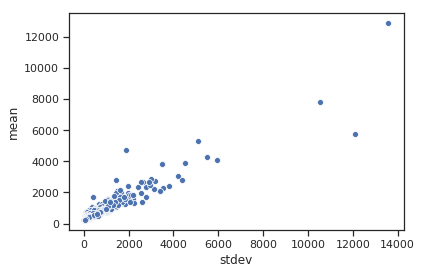

In [14]:
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")
#sns.pairplot(df, hue='Wavelength')
#sns.lineplot(x="Series", y="mean",
#             hue="Wavelength",
#             data=df)
#ax = sns.distplot(df[df['Wavelength'] == 679]['max'], color="m")
#ax = sns.violinplot(x="Wavelength",y="mean", data=df[df['Wavelength'] == 679])
ax = sns.scatterplot(x="stdev",y="mean", data=df[df['Wavelength'] == 525])
#ax.set_yscale('log')

In [ ]:
plt.show()